In [15]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

## Probabilistic cue competition

In [110]:

n_trials = 40

# AB+ | A-
cue_data =  [(1,1)] * (n_trials//2) +[(1,0)] * (n_trials//2)
effect_data =  list(np.random.binomial(1,0.75,n_trials//2)) +  list(np.random.binomial(1,0.25,n_trials//2)) 

# AB+ | B+
#cue_data =  [(1,1)]  * (n_trials//2)  +[(0,1)]  * (n_trials//2 )
#effect_data =  np.random.binomial(1,0.75,n_trials)

# A+ | AB+
cue_data =  [(1,0)]  * (n_trials//2)  +[(1,1)]  * (n_trials//2 )
effect_data =  np.random.binomial(1,0.75,n_trials)

data = np.concatenate((cue_data, np.array([effect_data]).T), axis=1)
              

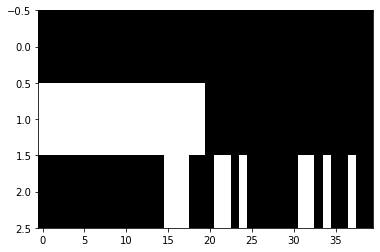

In [111]:
plt.imshow(data.T, aspect='auto', cmap='Greys')

In [112]:
# a--> b <--> non-a ou b

In [113]:
# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

In [114]:
def simple_competition_equiv(data, alpha=10):
    plt.figure(figsize=(30,60))
    # H0 : non A et non B <=> C 
    H0 = ((0,0,1), (1,1,0))
    # H1 : A <=> C : non-A ou C
    H1 = ((0,0,0), (0,1,0),  (1,0,1), (1,1,1)) 
    # H2 : B <=> C : non B ou C
    H2 = ((0,0,0), (1,0,0),  (0,1,1), (1,1,1)) 
    beta_ = {'H0':[1,1], 'H1':[1,1], 'H2':[1,1]}
    count = {'H0':0, 'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(15,5,i+1)
        lik['H0'] = int(tuple(obs) in H0)
        lik['H1'] = int(tuple(obs) in H1)
        lik['H2'] = int(tuple(obs) in H2)
        #print(lik['H0'], lik['H1'], lik['H2'])
        dir['H0'] = (count['H0']+ alpha/3) / (n + alpha)
        dir['H1'] = (count['H1']+ alpha/3) / (n + alpha)
        dir['H2'] = (count['H2']+ alpha/3) / (n + alpha)
        z = lik['H0'] * dir['H0'] + lik['H1'] * dir['H1'] +  lik['H2'] * dir['H2']
        p = ((lik['H0'] * dir['H0']) / z,
             (lik['H1'] * dir['H1']) / z,
             (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H0','H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        beta_['H0'][int(choice=='H0')] += 1
        beta_['H1'][int(choice=='H1')] += 1
        beta_['H2'][int(choice=='H2')] += 1
        print(beta_)
        pdf_H0 = beta.pdf(x, beta_['H0'][1], beta_['H0'][0])
        pdf_H1 = beta.pdf(x, beta_['H1'][1], beta_['H1'][0])
        pdf_H2 = beta.pdf(x, beta_['H2'][1], beta_['H2'][0])
        ax.plot(x, pdf_H0, label=r'H0: null', color='tab:orange')
        ax.plot(x, pdf_H1, label=r'H1: $A \leftrightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \leftrightarrow C$', color='tab:green')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

(0.0, 1.0, 0.0) H1
{'H0': [2, 1], 'H1': [1, 2], 'H2': [2, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [3, 1], 'H1': [1, 3], 'H2': [3, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [4, 1], 'H1': [1, 4], 'H2': [4, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [5, 1], 'H1': [1, 5], 'H2': [5, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [6, 1], 'H1': [1, 6], 'H2': [6, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [7, 1], 'H1': [1, 7], 'H2': [7, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [8, 1], 'H1': [1, 8], 'H2': [8, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [9, 1], 'H1': [1, 9], 'H2': [9, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [10, 1], 'H1': [1, 10], 'H2': [10, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [11, 1], 'H1': [1, 11], 'H2': [11, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [12, 1], 'H1': [1, 12], 'H2': [12, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [13, 1], 'H1': [1, 13], 'H2': [13, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [14, 1], 'H1': [1, 14], 'H2': [14, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [15, 1], 'H1': [1, 15], 'H2': [15, 1]}
(0.0, 1.0, 0.0) H1
{'H0': [16, 1], 'H1': [1, 16], 'H2': [16, 1]}
(0.0, 0.0, 1.0) H2
{'H0': [17, 1], 'H1': [2, 16],

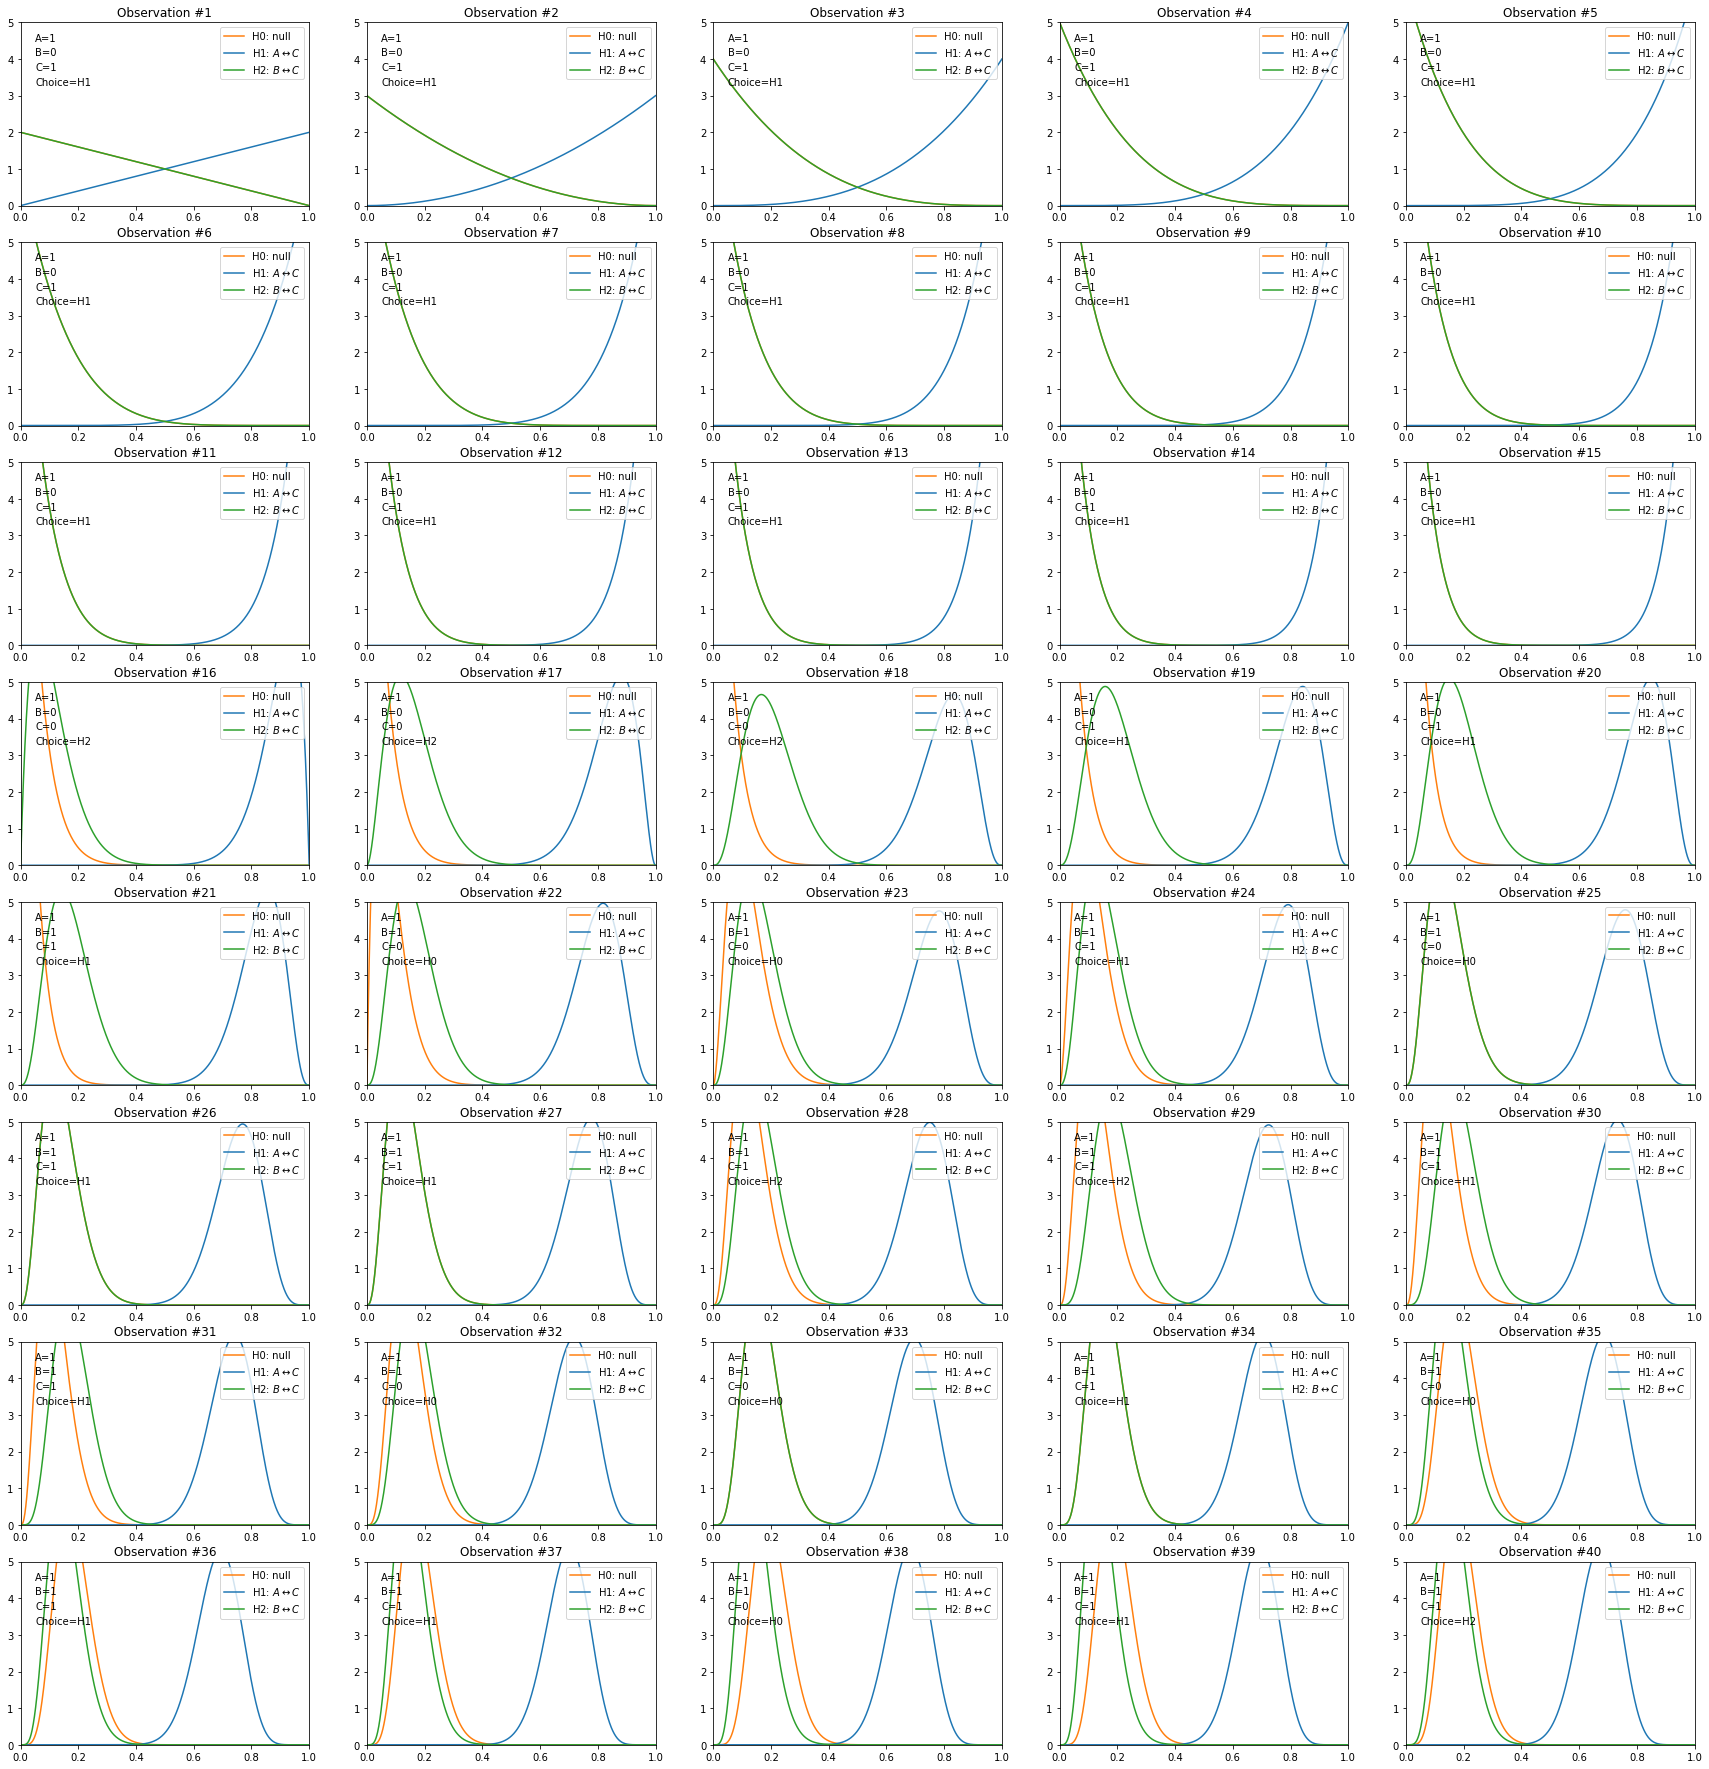

In [116]:
beta_, count = simple_competition_equiv(data)

In [95]:
def simple_competition_prob(data, alpha=10):
    plt.figure(figsize=(30,60))
    # H1 : A => C : non-A ou C
    val = {}
    val['H1'] = ((0,0,0), (0,1,0),  (1,0,1), (1,1,1)) 
    # H2 : B => C : non B ou C
    val['H2'] = ((0,0,0), (1,0,0),  (0,1,1), (1,1,1)) 
    obs_beta = { 'H1':[1,1], 'H2':[1,1]}
    choice_beta = { 'H1':[1,1], 'H2':[1,1]}
    count = { 'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(15,5,i+1)
        z = 0
        for k in ('H1', 'H2'):
            k_obs = int(tuple(obs) in val[k])           
            q = beta.rvs(obs_beta[k][1], obs_beta[k][0])
            q = beta.rvs(choice_beta[k][1], choice_beta[k][0])
            lik[k] = q * k_obs + (1-q) * (1-k_obs)
            dir[k] = (count[k]+ alpha/2) / (n + alpha)
            z += lik[k] * dir[k]
            obs_beta[k][k_obs] += 1
            
        p = ((lik['H1'] * dir['H1']) / z, (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        choice_beta['H1'][int(choice=='H1')] += 1
        choice_beta['H2'][int(choice=='H2')] += 1
        #print(beta_)
        pdf_H1 = beta.pdf(x, choice_beta['H1'][1], choice_beta['H1'][0])
        pdf_H2 = beta.pdf(x, choice_beta['H2'][1], choice_beta['H2'][0])
        ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \rightarrow C$', color='tab:orange')
        pdf_H1 = beta.pdf(x, obs_beta['H1'][1], obs_beta['H1'][0])
        pdf_H2 = beta.pdf(x, obs_beta['H2'][1], obs_beta['H2'][0])
        ax.plot(x, pdf_H1, '--', label=r'H1: $A \rightarrow C$',  color='tab:blue')
        ax.plot(x, pdf_H2, '--', label=r'H2: $B \rightarrow C$', color='tab:orange')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

(0.6601505570967278, 0.3398494429032722) H2
(0.2140489624608292, 0.7859510375391708) H2
(0.2179539932734488, 0.7820460067265511) H2
(0.006236177786648225, 0.9937638222133518) H2
(0.09983632902634167, 0.9001636709736582) H2
(0.8489854146019491, 0.15101458539805088) H2
(0.01319345774135393, 0.9868065422586462) H2
(0.9410593952426671, 0.058940604757332836) H2
(0.009103357320532891, 0.9908966426794671) H2
(0.020426987403469588, 0.9795730125965305) H2
(0.06891268085102814, 0.9310873191489718) H2
(0.9295907767873188, 0.07040922321268124) H1
(0.8751204305231749, 0.12487956947682514) H1
(0.022092940044212903, 0.9779070599557872) H2
(0.0589203401628642, 0.9410796598371359) H2
(0.06251806191864714, 0.9374819380813527) H2
(0.59543426459216, 0.4045657354078399) H1
(0.056149864164632586, 0.9438501358353675) H2
(0.7189677536068044, 0.28103224639319563) H2
(0.028762019545158533, 0.9712379804548414) H2
(0.11848665585943308, 0.8815133441405669) H1
(0.318627914025899, 0.681372085974101) H2
(0.2895337664

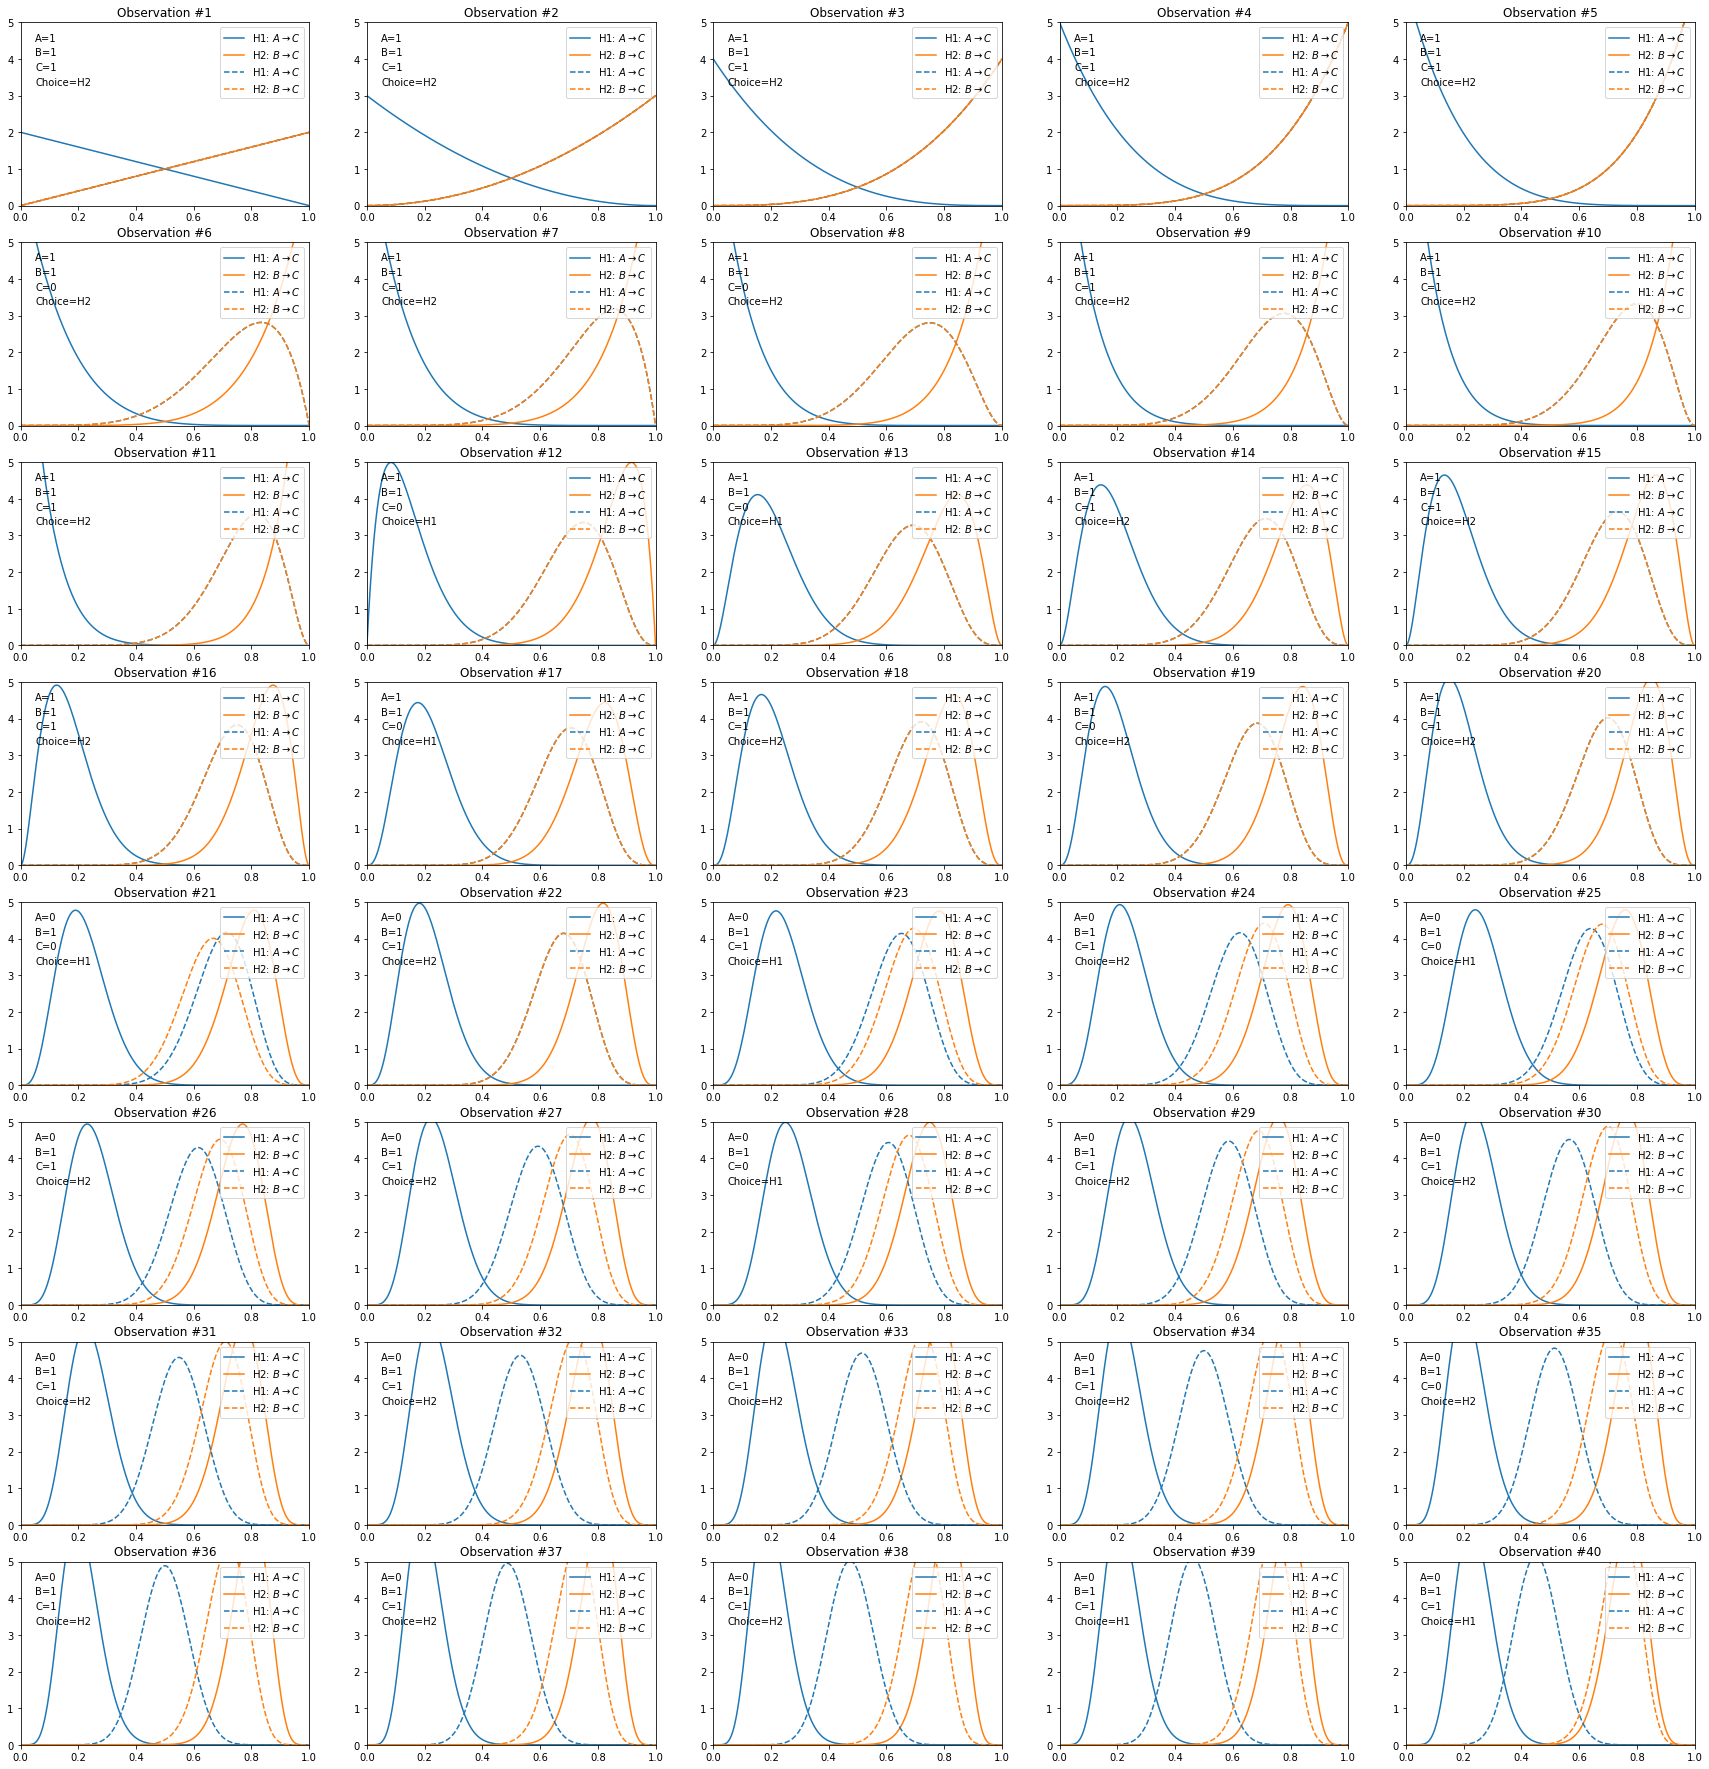

In [97]:
beta_, count = simple_competition(data)